<a href="https://colab.research.google.com/github/darshk07/VITMAS-datascience/blob/main/Task1/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1      
Author: Darsh Kejriwal            
Task description: None
            


Importing Modules

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Reading dataset

In [6]:
data = pd.read_csv('Shark Tank India Dataset.csv')
data.head()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000


Randomising the dataset

In [7]:
data = data.sample(frac=1).reset_index(drop=True)
data = data.drop(columns='pitch_number')

Data Description

In [10]:
data.head()

,episode_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,2,Head and Heart,Brain Development Course,0,50.0,5.0,1000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,22,Falhari,Fresh Fruits,0,50.0,2.0,2500.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,33,Proxgy,VR,1,35.0,1.0,3500.0,10.0,10.0,100.0,...,1,0,0,0,0,1,0,2,5.0,5.0
3,17,Outbox,Premium Surprise-Planning,0,50.0,5.0,1000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,26,Julaa Automation,Automatic Cradle,0,50.0,10.0,500.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [11]:
data.tail()

,episode_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
112,13,Caragreen,Eco-Friendly boxes,1,50.0,10.0,500.0,50.0,20.0,250.0,...,0,1,0,0,0,1,0,2,25.0,10.0
113,19,WeSTOCK,Livestock health monitoring AI,1,50.0,5.0,1000.0,60.0,10.0,600.0,...,1,0,1,1,0,1,0,4,15.0,2.5
114,18,Mommy's Kitchen,Thin Crust Pizza,0,90.0,3.0,3000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
115,31,Astrix,Smart Locks,0,75.0,3.0,2500.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
116,17,Find Your Kicks India,Sneaker Resale,1,50.0,10.0,500.0,50.0,25.0,200.0,...,1,1,1,1,0,1,0,5,10.0,5.0


In [12]:
data.nunique()

episode_number            35
brand_name               117
idea                     117
deal                       2
pitcher_ask_amount        26
ask_equity                17
ask_valuation             48
deal_amount               21
deal_equity               28
deal_valuation            39
ashneer_present            2
anupam_present             1
aman_present               2
namita_present             2
vineeta_present            2
peyush_present             2
ghazal_present             2
ashneer_deal               2
anupam_deal                2
aman_deal                  2
namita_deal                2
vineeta_deal               2
peyush_deal                2
ghazal_deal                2
total_sharks_invested      6
amount_per_shark          27
equity_per_shark          35
dtype: int64

In [13]:
data.shape #shape of data

(117, 27)

In [14]:
data.isnull().sum() #no missing values

episode_number           0
brand_name               0
idea                     0
deal                     0
pitcher_ask_amount       0
ask_equity               0
ask_valuation            0
deal_amount              0
deal_equity              0
deal_valuation           0
ashneer_present          0
anupam_present           0
aman_present             0
namita_present           0
vineeta_present          0
peyush_present           0
ghazal_present           0
ashneer_deal             0
anupam_deal              0
aman_deal                0
namita_deal              0
vineeta_deal             0
peyush_deal              0
ghazal_deal              0
total_sharks_invested    0
amount_per_shark         0
equity_per_shark         0
dtype: int64

In [15]:
print(data.groupby('deal_equity').size())


deal_equity
0.00     52
1.00      1
1.50      1
2.00      1
2.50      1
2.68      1
2.75      1
3.00      4
3.50      1
4.00      4
5.00      1
6.00      5
7.00      1
7.50      1
10.00     7
12.00     1
15.00     9
16.00     1
20.00     7
21.00     1
24.00     2
25.00     4
30.00     3
33.30     1
35.00     1
40.00     2
50.00     2
75.00     1
dtype: int64


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   episode_number         117 non-null    int64  
 1   brand_name             117 non-null    object 
 2   idea                   117 non-null    object 
 3   deal                   117 non-null    int64  
 4   pitcher_ask_amount     117 non-null    float64
 5   ask_equity             117 non-null    float64
 6   ask_valuation          117 non-null    float64
 7   deal_amount            117 non-null    float64
 8   deal_equity            117 non-null    float64
 9   deal_valuation         117 non-null    float64
 10  ashneer_present        117 non-null    int64  
 11  anupam_present         117 non-null    int64  
 12  aman_present           117 non-null    int64  
 13  namita_present         117 non-null    int64  
 14  vineeta_present        117 non-null    int64  
 15  peyush

In [17]:
data.describe()

,episode_number,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_present,anupam_present,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,18.735043,0.555556,319.854709,5.188034,3852.462479,31.982915,8.963504,467.104872,0.837607,1.0,...,0.179487,0.205128,0.239316,0.188034,0.128205,0.230769,0.059829,1.230769,18.132481,5.583590
std,10.070778,0.499041,2767.842777,3.892121,11931.601957,36.687391,13.106769,919.988864,0.370397,0.0,...,0.385410,0.405532,0.428501,0.392420,0.335756,0.423137,0.238190,1.410457,23.588682,10.803799
min,1.000000,0.000000,0.001010,0.250000,0.010000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,45.000000,2.500000,666.670000,0.000000,0.000000,0.000000,1.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,1.000000,50.000000,5.000000,1250.000000,25.000000,3.000000,100.000000,1.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.250000
75%,27.000000,1.000000,80.000000,7.500000,2857.140000,50.000000,15.000000,500.000000,1.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,25.000000,6.000000
max,35.000000,1.000000,30000.000000,25.000000,120000.000000,150.000000,75.000000,6666.670000,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,100.000000,75.000000


**<h1>Exploratory Data Analysis**

In [18]:
sns.pairplot(data, hue='deal_equity')

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f272abd8170> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f272abe3950> (for post_execute):


KeyboardInterrupt: ignored

**<h1>Correlation Matrix**

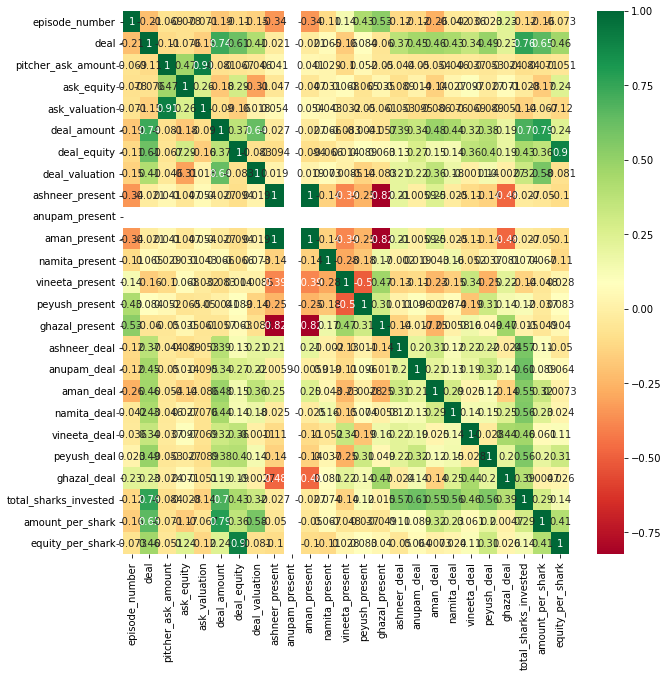

In [8]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True, cmap="RdYlGn")

**<h1>Histogram Features**

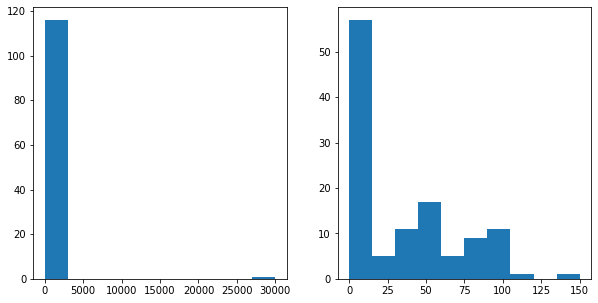

In [9]:
fig1 = plt.figure(figsize=(10,5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['pitcher_ask_amount'])
f2.hist(data['deal_amount'])
plt.show()

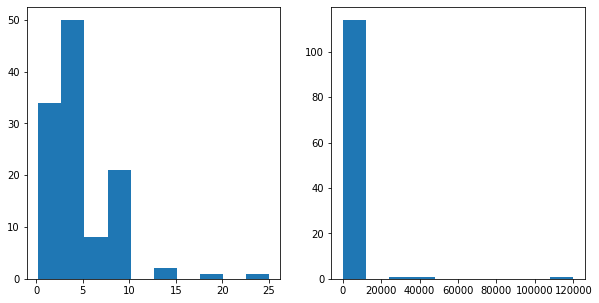

In [10]:
fig1 = plt.figure(figsize=(10,5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['ask_equity'])
f2.hist(data['ask_valuation'])
plt.show()

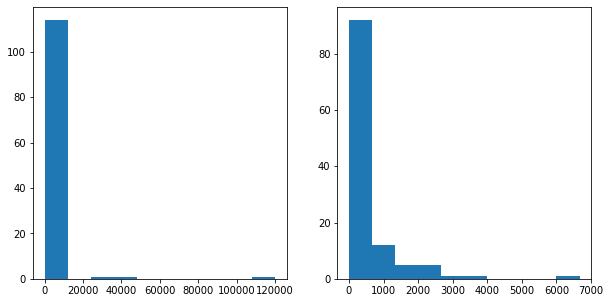

In [11]:
fig1 = plt.figure(figsize=(10,5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['ask_valuation'])
f2.hist(data['deal_valuation'])
plt.show()

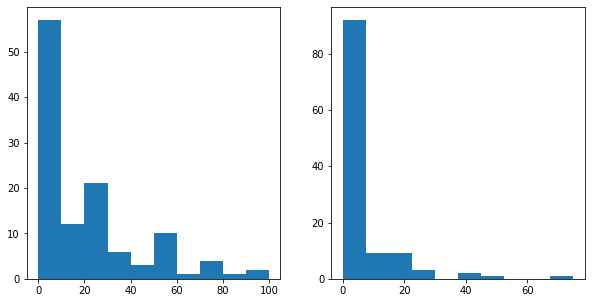

In [12]:
fig1 = plt.figure(figsize=(10,5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['amount_per_shark'])
f2.hist(data['equity_per_shark'])
plt.show()

## **Boxplots of features**

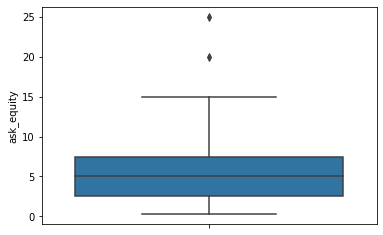

In [13]:
sns.boxplot(y='ask_equity',data=data)

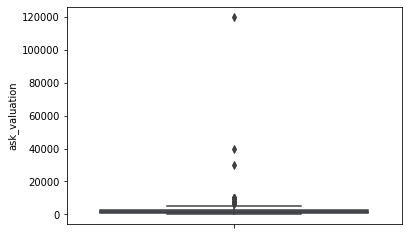

In [14]:
sns.boxplot(y='ask_valuation',data=data)

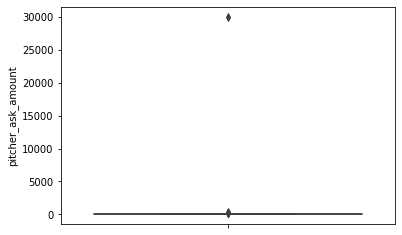

In [15]:
sns.boxplot(y='pitcher_ask_amount',data=data)

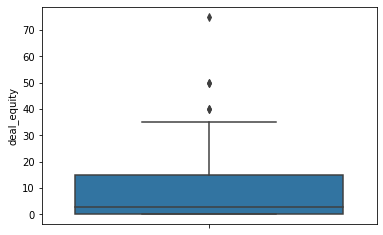

In [16]:
sns.boxplot(y='deal_equity',data=data)

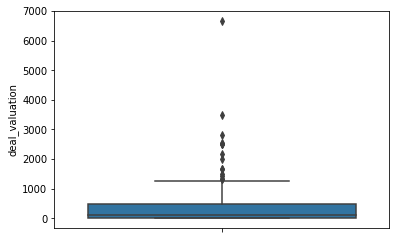

In [17]:
sns.boxplot(y='deal_valuation',data=data)

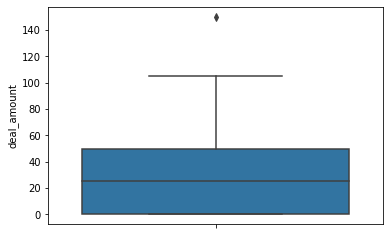

In [18]:
sns.boxplot(y='deal_amount',data=data)

## **Data Splitting**

In [27]:
data = data.drop(columns='brand_name')

In [28]:
data = data.drop(columns='idea')

In [30]:
X = data.iloc[:,0:19]
y = data['deal_amount']

In [32]:
X.head()

,episode_number,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_present,anupam_present,aman_present,namita_present,vineeta_present,peyush_present,ghazal_present,ashneer_deal,anupam_deal,aman_deal,namita_deal
0,5,0,10.0,20.00,50.0,0.0,0.0,0.0,1,1,1,1,1,0,0,0,0,0,0
1,34,0,30.0,7.50,400.0,0.0,0.0,0.0,1,1,1,1,1,1,1,0,0,0,0
2,3,0,100.0,0.25,40000.0,0.0,0.0,0.0,1,1,1,1,1,0,0,0,0,0,0
3,34,1,40.0,10.00,400.0,40.0,20.0,200.0,1,1,1,1,1,1,1,1,0,0,1
4,10,1,30.0,2.00,1500.0,30.0,3.0,1000.0,1,1,1,1,0,1,0,1,0,1,0


In [33]:
y.head()

0     0.0
1     0.0
2     0.0
3    40.0
4    30.0
Name: deal_amount, dtype: float64